# D206 Data Cleaning PA

## A. Research Question

## B. Description of Variables

## Data Cleaning Plan
### Libraries, Directory, and Data

In [1]:
# File path of CSV with raw data
file_path = 'churn_raw_data.csv'

In [2]:
# Libraries and packages
%matplotlib inline
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.decomposition import PCA
from scipy import stats

In [3]:
# Load the dataset
# Set the first column of the dataset as the index
df = pd.read_csv(file_path, index_col=0)
pd.set_option('future.no_silent_downcasting', True)
df.head()

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,...,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,150.761216,271.493436,4,4,4,3,4,4,4,5


### Initial Exploration of the Full DataFrame

In [4]:
# Get column information on all 52 columns and check for non-nulls
# against number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education             10

In [5]:
# Describe the quantitative data but transpose to get the data in a format
# easier to read visually
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CaseOrder,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.00000
Zip,10000.0,49153.319600,27532.196108,601.000000,26292.500000,48869.500000,71866.500000,99929.00000
Lat,10000.0,38.757567,5.437389,17.966120,35.341828,39.395800,42.106908,70.64066
Lng,10000.0,-90.782536,15.156142,-171.688150,-97.082812,-87.918800,-80.088745,-65.66785
Population,10000.0,9756.562400,14432.698671,0.000000,738.000000,2910.500000,13168.000000,111850.00000
Children,7505.0,2.095936,2.154758,0.000000,0.000000,1.000000,3.000000,10.00000
Age,7525.0,53.275748,20.753928,18.000000,35.000000,53.000000,71.000000,89.00000
Income,7510.0,39936.762226,28358.469482,740.660000,19285.522500,33186.785000,53472.395000,258900.70000
Outage_sec_perweek,10000.0,11.452955,7.025921,-1.348571,8.054362,10.202896,12.487644,47.04928
Email,10000.0,12.016000,3.025898,1.000000,10.000000,12.000000,14.000000,23.00000


In [6]:
# Get shape of DataFrame
df.shape

(10000, 51)

In [7]:
# Look for missing values from the DataFrame (Walker, 2004, p. 25)
df.isnull().sum()

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService         2129
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [8]:
# Run .nunique() against the DataFrame to return the number of unique variables
# found in each column (McCoy 2024)
df.nunique()

CaseOrder               10000
Customer_id             10000
Interaction             10000
City                     6058
State                      52
County                   1620
Zip                      8583
Lat                      8563
Lng                      8655
Population               5933
Area                        3
Timezone                   25
Job                       639
Children                   11
Age                        72
Education                  12
Employment                  5
Income                   7506
Marital                     5
Gender                      3
Churn                       2
Outage_sec_perweek       9993
Email                      23
Contacts                    8
Yearly_equip_failure        6
Techie                      2
Contract                    3
Port_modem                  2
Tablet                      2
InternetService             2
Phone                       2
Multiple                    2
OnlineSecurity              2
OnlineBack

### Initial Observations

- The column headers don't follow any recognizable naming convention; it would be best to change them to snake_case as a Python convention.
- Of the identifier variables, `CaseOrder`, `Customer_id`, and `Interaction`, all three have 10,000 unique entries as expected.
- `States` has 52 unique values, suggesting that Washington DC and Puerto Rico count as US territories.
- The minimum value of `Zip` is only 3 digits, with the minimum ZIP code needing to be 5 digits long. Some US east coast ZIP codes start with 0 so these will need to be filled in to retain 5 digits and then converted to strings.
- `Timezones` has too many values for the number of time zones in the United States. This will need to be explored further.
- The following variables should likely be expressed as categorical variables based on the low number of unique values (Boolean/nominal/ordinal to be determined upon further inspection):
  - `Area`, `Timezone`, `Education`, `Employment`, `Marital`, `Gender`, `Churn`, `Techie`, `Contract`, `Port_modem`, `Tablet`, `InternetService`, `Phone`, `Multiple`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `PaperlessBilling`, `PaymentMethod`, `item1`, `item2`, `item3`, `item4`, `item5`, `item6`, `item7`, `item8`.
- Of the numeric variables, the following have missing values:
  - `Children`, `Age`, `Income`, `Tenure`, and `Bandwidth_GB_Year`.
  - `Children`, `Age`, and `Income` are information provided by the customer but `Tenure` and `Bandwidth_GB_Year` should be measured internally and it may be worth investigating why these two columns are missing that data.

In [9]:
# Missing No Matrix
# msno.matrix(df, labels=True)

### Initial Findings
No duplicate rows were found. All 10,000 rows are unique enough to be retained.

## C4. Data Cleaning Code (Detection)

In [10]:
# Check for any duplicate rows; 10,000 rows present in dataset
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

### CaseOrder

In [11]:
# Run .nunique() against the column to return the number of unique variables
df['CaseOrder'].nunique()

10000

In [12]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['CaseOrder'].value_counts()

CaseOrder
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

### Customer_id

In [13]:
# Run .nunique() against the column to return the number of unique variables
df['Customer_id'].nunique()

10000

In [14]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Customer_id'].value_counts()

Customer_id
K409198    1
X300173    1
M155745    1
G126132    1
O148559    1
          ..
F454437    1
W845098    1
P854487    1
K983374    1
T38070     1
Name: count, Length: 10000, dtype: int64

### Interaction

In [15]:
# Run .nunique() against the column to return the number of unique variables
df['Interaction'].nunique()

10000

In [16]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Interaction'].value_counts()

Interaction
aa90260b-4141-4a24-8e36-b04ce1f4f77b    1
26769b47-8eda-4e14-9baf-7348b64b7da3    1
6d65ca83-1001-4d01-a3f9-c3ae5ac33a83    1
448944cf-10f6-4a04-a8e0-4079b6791e26    1
a9890702-06c6-4337-9d5b-65f7d1e30466    1
                                       ..
c650b63b-2d68-48f2-911d-6e8c838c8185    1
3006986f-69e9-4c80-8dcb-1f8d917f2071    1
0e3b8690-177a-4bce-a4e9-823682ce8aec    1
25400298-b615-407d-9e79-25fb89b38429    1
9de5fb6e-bd33-4995-aec8-f01d0172a499    1
Name: count, Length: 10000, dtype: int64

### City

In [17]:
# Run .nunique() against the column to return the number of unique variables
df['City'].nunique()

6058

In [18]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['City'].value_counts()

City
Houston         34
New York        24
Springfield     23
Buffalo         23
San Antonio     22
                ..
Cottontown       1
San Dimas        1
Fort Hill        1
Webster          1
Clarkesville     1
Name: count, Length: 6058, dtype: int64

In [19]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['City'].describe()

count       10000
unique       6058
top       Houston
freq           34
Name: City, dtype: object

### State

In [20]:
# Run .nunique() against the column to return the number of unique variables
df['State'].nunique()

52

In [21]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['State'].value_counts()

State
TX    603
NY    558
PA    550
CA    526
IL    413
OH    359
FL    324
MO    310
VA    285
NC    280
IA    279
MI    279
MN    264
WV    247
IN    241
GA    238
KY    238
WI    228
OK    203
KS    195
NJ    190
TN    185
AL    181
NE    181
AR    176
WA    175
MA    172
CO    155
LA    141
MS    126
SC    124
MD    123
ND    118
NM    114
OR    114
AZ    112
ME    112
SD    101
MT     96
NH     85
VT     84
ID     81
AK     77
CT     71
UT     66
NV     48
WY     43
PR     40
HI     35
DE     21
RI     19
DC     14
Name: count, dtype: int64

In [22]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['State'].describe()

count     10000
unique       52
top          TX
freq        603
Name: State, dtype: object

### County

In [23]:
# Run .nunique() against the column to return the number of unique variables
df['County'].nunique()

1620

In [24]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['County'].value_counts()

County
Washington     111
Jefferson      100
Montgomery      99
Franklin        92
Los Angeles     91
              ... 
Rooks            1
Cochise          1
Yauco            1
Hoke             1
Briscoe          1
Name: count, Length: 1620, dtype: int64

In [25]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['County'].describe()

count          10000
unique          1620
top       Washington
freq             111
Name: County, dtype: object

### Zip

In [26]:
# Run .nunique() against the column to return the number of unique variables
df['Zip'].nunique()

8583

In [27]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Zip'].value_counts()

Zip
32340    4
75077    4
44310    4
61764    4
16115    4
        ..
43788    1
58579    1
53526    1
79104    1
30523    1
Name: count, Length: 8583, dtype: int64

In [28]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Zip'].describe()

count    10000.000000
mean     49153.319600
std      27532.196108
min        601.000000
25%      26292.500000
50%      48869.500000
75%      71866.500000
max      99929.000000
Name: Zip, dtype: float64

### Lat

In [29]:
# Run .nunique() against the column to return the number of unique variables
df['Lat'].nunique()

8563

In [30]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Lat'].value_counts()

Lat
40.88228    4
41.10660    4
33.07885    4
34.50111    4
42.62422    4
           ..
40.41087    1
39.80226    1
47.18203    1
42.97410    1
34.70783    1
Name: count, Length: 8563, dtype: int64

### Lng

In [31]:
# Run .nunique() against the column to return the number of unique variables
df['Lng'].nunique()

8655

In [32]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Lng'].value_counts()

Lng
-88.62818    4
-83.43505    4
-97.06273    4
-80.46337    4
-81.49710    4
            ..
-95.13148    1
-81.80349    1
-81.32795    1
-82.10829    1
-83.53648    1
Name: count, Length: 8655, dtype: int64

### Population

In [33]:
# Run .nunique() against the column to return the number of unique variables
df['Population'].nunique()

5933

In [34]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Population'].value_counts()

Population
0        97
94       14
39       12
110      12
227      11
         ..
9295      1
24092     1
10211     1
26177     1
12230     1
Name: count, Length: 5933, dtype: int64

In [35]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

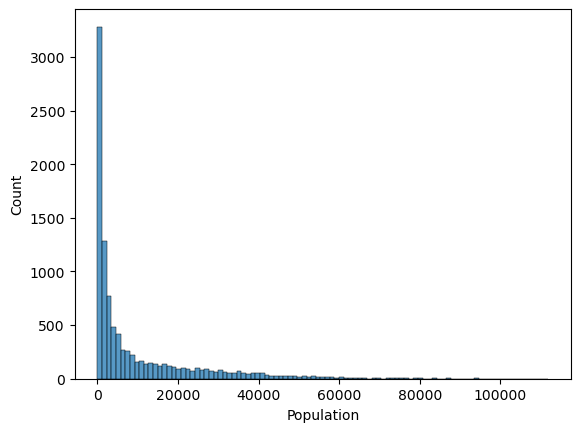

In [36]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Population');

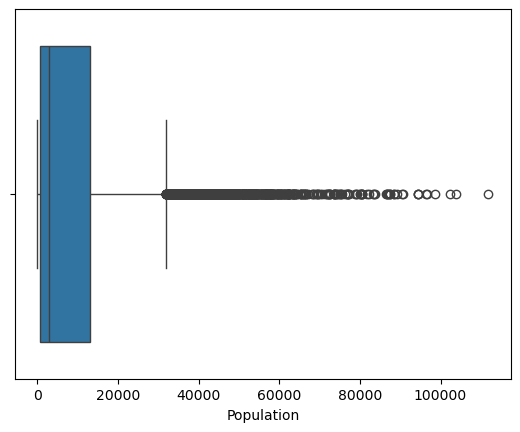

In [37]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Population');

### Area

In [38]:
# Run .nunique() against the column to return the number of unique variables
df['Area'].nunique()

3

In [39]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Area'].value_counts()

Area
Suburban    3346
Urban       3327
Rural       3327
Name: count, dtype: int64

In [40]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Area'].describe()

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object

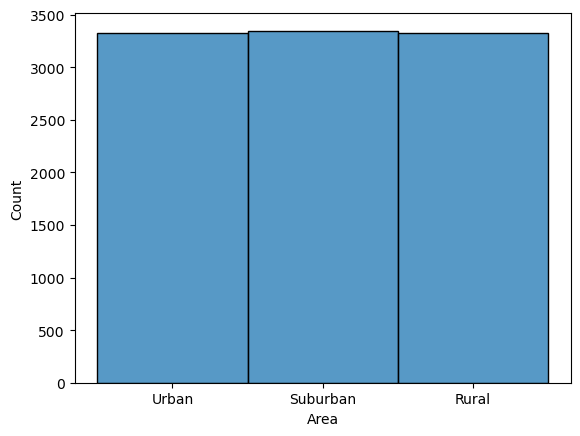

In [41]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Area');

### Timezone

In [42]:
# Run .nunique() against the column to return the number of unique variables
df['Timezone'].nunique()

25

In [43]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Timezone'].value_counts()

Timezone
America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: count, dty

In [44]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Timezone'].describe()

count                10000
unique                  25
top       America/New_York
freq                  4072
Name: Timezone, dtype: object

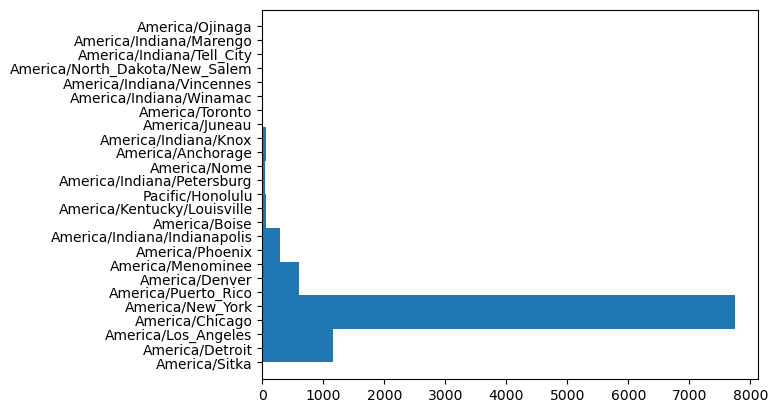

In [45]:
# Create histogram to view a preliminary spread of the data and distribution
plt.hist(data=df, x='Timezone', orientation='horizontal');

### Job

In [46]:
# Run .nunique() against the column to return the number of unique variables
df['Job'].nunique()

639

In [47]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Job'].value_counts()

Job
Occupational psychologist               30
Comptroller                             28
Hospital pharmacist                     28
Horticultural therapist                 28
Ranger/warden                           27
                                        ..
Control and instrumentation engineer     6
Travel agency manager                    6
Accountant, chartered certified          6
Arboriculturist                          6
Toxicologist                             6
Name: count, Length: 639, dtype: int64

In [48]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Job'].describe()

count                         10000
unique                          639
top       Occupational psychologist
freq                             30
Name: Job, dtype: object

### Children

In [49]:
# Run .nunique() against the column to return the number of unique variables
df['Children'].nunique()

11

In [50]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Children'].value_counts()

Children
0.0     1919
1.0     1874
2.0     1100
3.0     1096
4.0      769
5.0      161
8.0      158
7.0      149
6.0      135
10.0      74
9.0       70
Name: count, dtype: int64

In [51]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Children'].describe()

count    7505.000000
mean        2.095936
std         2.154758
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

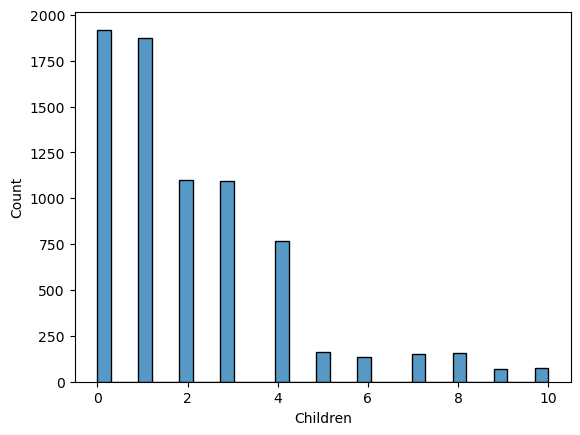

In [52]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Children');

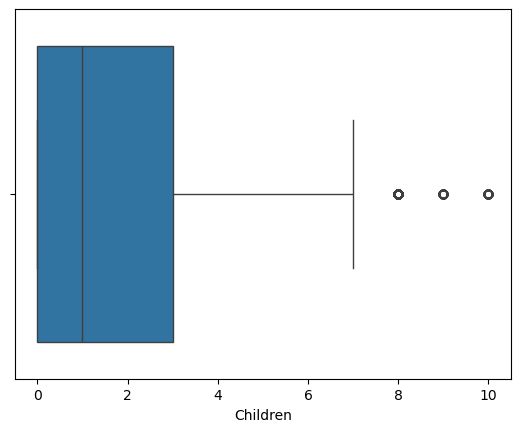

In [53]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Children');

### Age

In [54]:
# Run .nunique() against the column to return the number of unique variables
df['Age'].nunique()

72

In [55]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Age'].value_counts()

Age
55.0    128
41.0    122
77.0    121
80.0    120
57.0    120
       ... 
59.0     92
78.0     92
87.0     92
18.0     90
47.0     87
Name: count, Length: 72, dtype: int64

In [56]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Age'].describe()

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

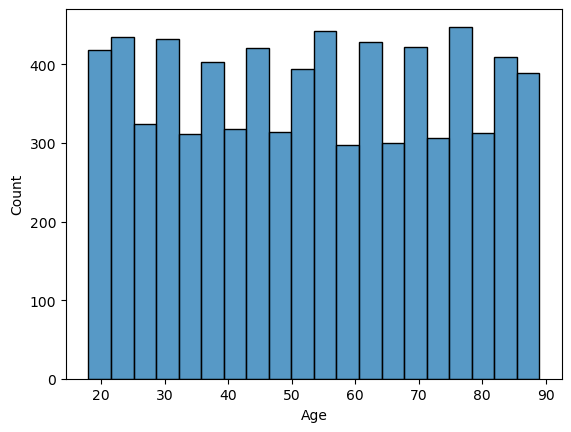

In [57]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Age');

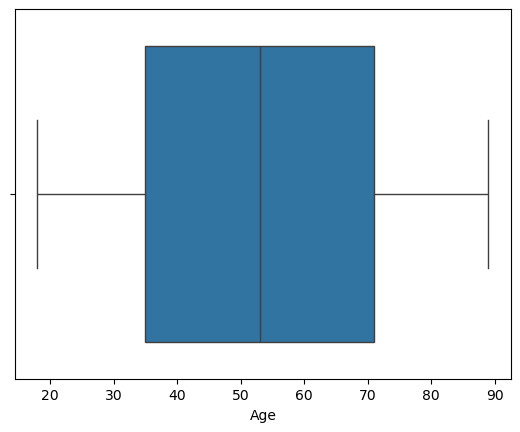

In [58]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Age');

### Education

In [59]:
# Run .nunique() against the column to return the number of unique variables
df['Education'].nunique()

12

In [60]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Education'].value_counts()

Education
Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: count, dtype: int64

In [61]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Education'].describe()

count                           10000
unique                             12
top       Regular High School Diploma
freq                             2421
Name: Education, dtype: object

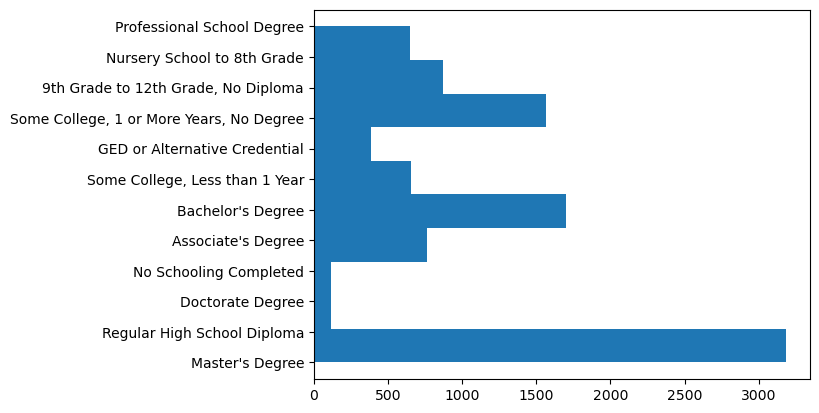

In [62]:
# Create histogram to view a preliminary spread of the data and distribution
plt.hist(data=df, x='Education', orientation='horizontal');

### Employment

In [63]:
# Run .nunique() against the column to return the number of unique variables
df['Employment'].nunique()

5

In [64]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Employment'].value_counts()

Employment
Full Time     5992
Part Time     1042
Retired       1011
Unemployed     991
Student        964
Name: count, dtype: int64

In [65]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Employment'].describe()

count         10000
unique            5
top       Full Time
freq           5992
Name: Employment, dtype: object

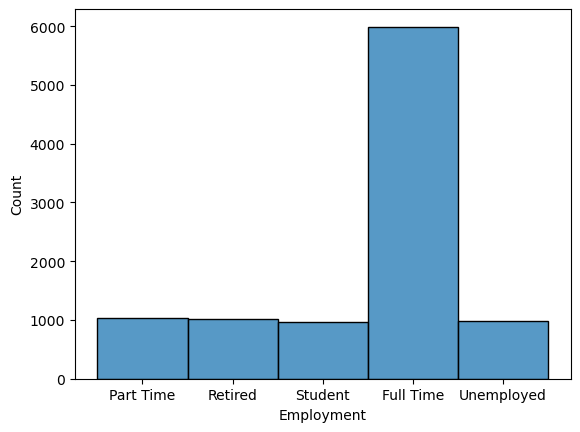

In [66]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Employment');

### Income

In [67]:
# Run .nunique() against the column to return the number of unique variables
df['Income'].nunique()

7506

In [68]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Income'].value_counts()

Income
61325.92    2
36461.20    2
25598.66    2
10530.09    2
28561.99    1
           ..
23947.08    1
25781.26    1
28955.02    1
57295.46    1
16667.58    1
Name: count, Length: 7506, dtype: int64

In [69]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Income'].describe()

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: Income, dtype: float64

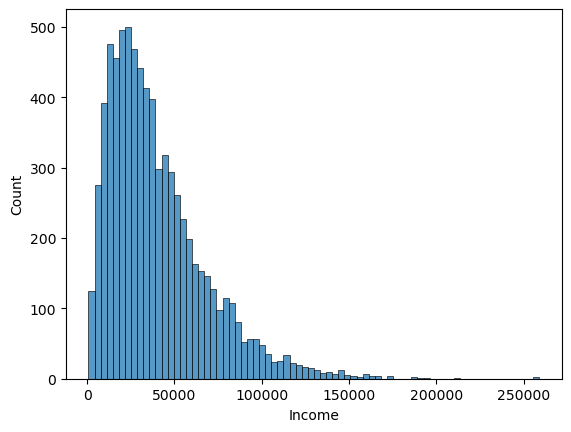

In [70]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Income');

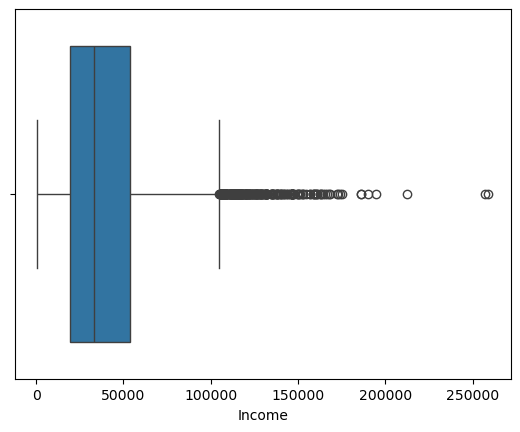

In [71]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Income');

### Marital

In [72]:
# Run .nunique() against the column to return the number of unique variables
df['Marital'].nunique()

5

In [73]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Marital'].value_counts()

Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64

In [74]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Marital'].describe()

count        10000
unique           5
top       Divorced
freq          2092
Name: Marital, dtype: object

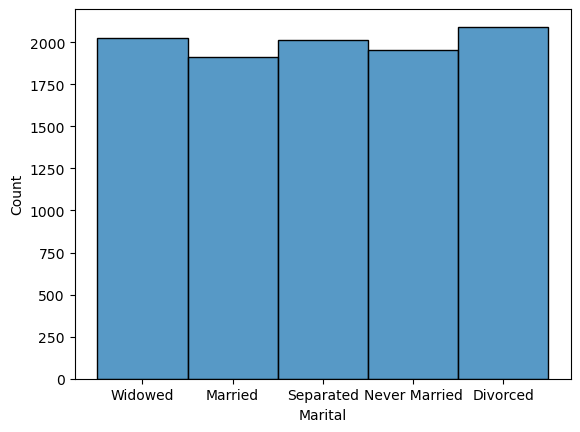

In [75]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Marital');

### Gender

In [76]:
# Run .nunique() against the column to return the number of unique variables
df['Gender'].nunique()

3

In [77]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Gender'].value_counts()

Gender
Female                  5025
Male                    4744
Prefer not to answer     231
Name: count, dtype: int64

In [78]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Gender'].describe()

count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object

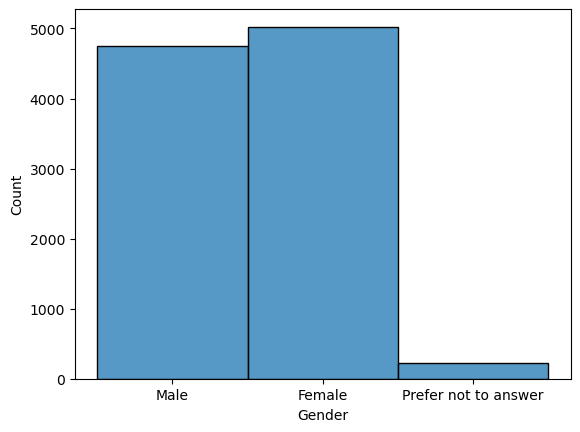

In [79]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Gender');

### Churn

In [80]:
# Run .nunique() against the column to return the number of unique variables
df['Churn'].nunique()

2

In [81]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Churn'].value_counts()

Churn
No     7350
Yes    2650
Name: count, dtype: int64

In [82]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

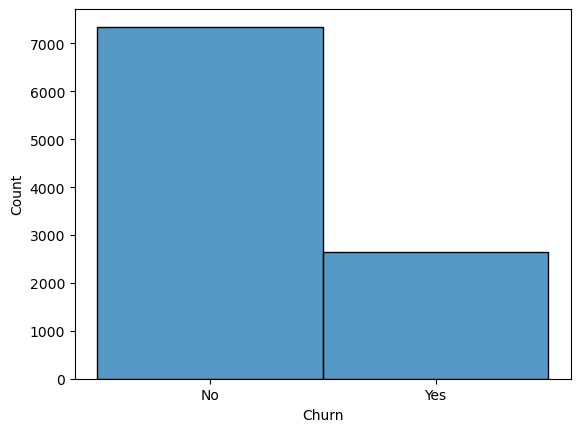

In [83]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Churn');

### Outage_sec_perweek

In [84]:
# Run .nunique() against the column to return the number of unique variables
df['Outage_sec_perweek'].nunique()

9993

In [85]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Outage_sec_perweek'].value_counts()

Outage_sec_perweek
6.242131     2
15.015440    2
12.130800    2
12.107050    2
10.344120    2
            ..
12.972680    1
6.475414     1
18.675760    1
37.595920    1
12.641760    1
Name: count, Length: 9993, dtype: int64

In [86]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

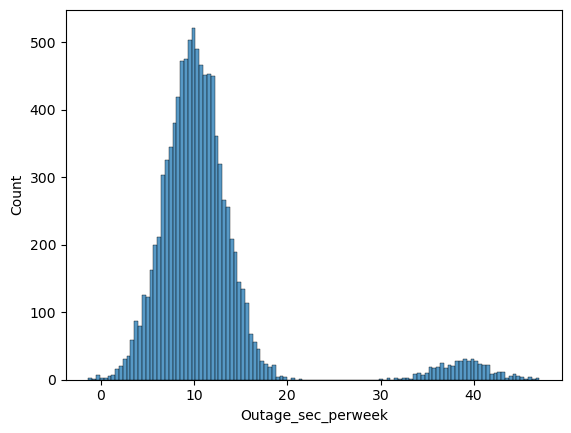

In [87]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Outage_sec_perweek');

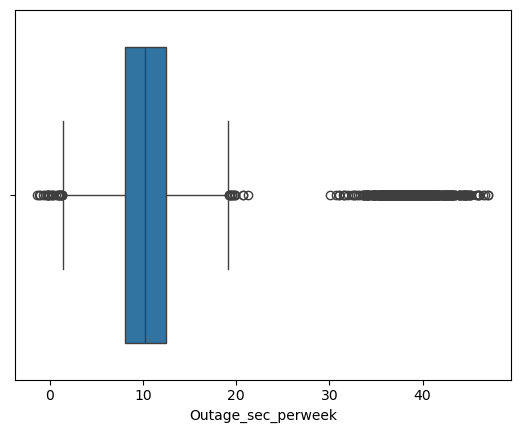

In [88]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Outage_sec_perweek');

### Email

In [89]:
# Run .nunique() against the column to return the number of unique variables
df['Email'].nunique()

23

In [90]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Email'].value_counts()

Email
12    1310
11    1291
13    1268
10    1074
14    1060
15     779
9      774
8      543
16     517
17     351
7      316
18     203
6      185
5      109
19     100
20      51
4       31
3       14
21      12
2        6
1        3
22       2
23       1
Name: count, dtype: int64

In [91]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

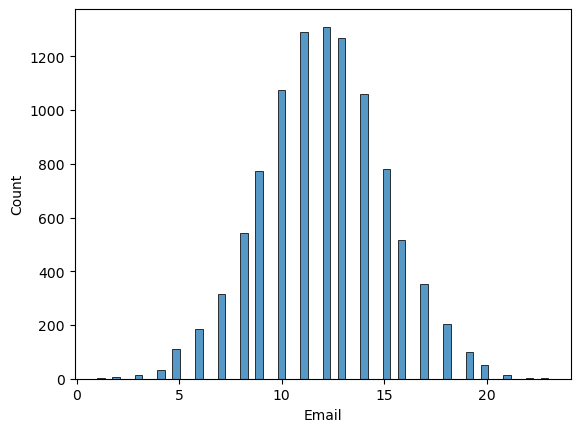

In [92]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Email');

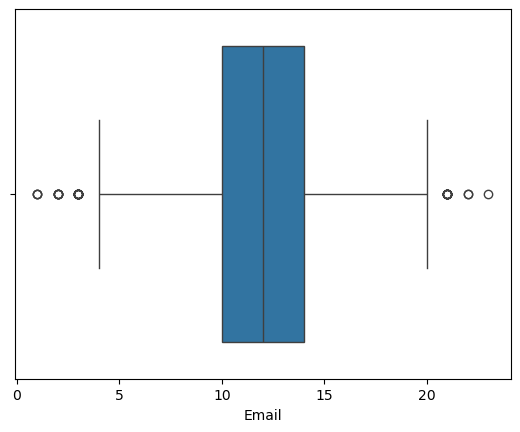

In [93]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Email');

### Contacts

In [94]:
# Run .nunique() against the column to return the number of unique variables
df['Contacts'].nunique()

8

In [95]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Contacts'].value_counts()

Contacts
0    3680
1    3675
2    1872
3     608
4     137
5      20
6       5
7       3
Name: count, dtype: int64

In [96]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

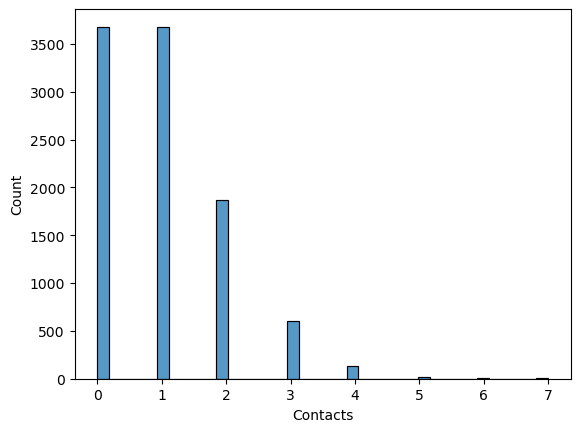

In [97]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Contacts');

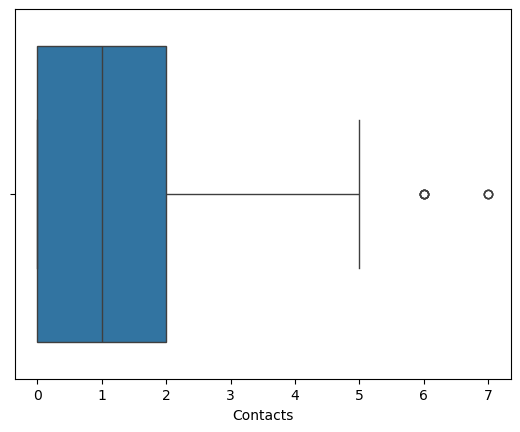

In [98]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Contacts');

### Yearly_equip_failure

In [99]:
# Run .nunique() against the column to return the number of unique variables
df['Yearly_equip_failure'].nunique()

6

In [100]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Yearly_equip_failure'].value_counts()

Yearly_equip_failure
0    6727
1    2670
2     509
3      86
4       7
6       1
Name: count, dtype: int64

In [101]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

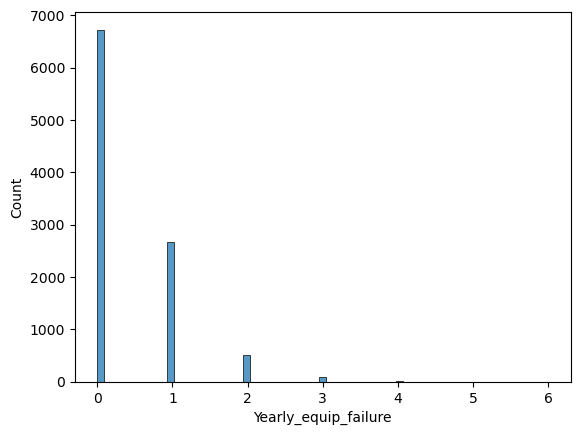

In [102]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Yearly_equip_failure');

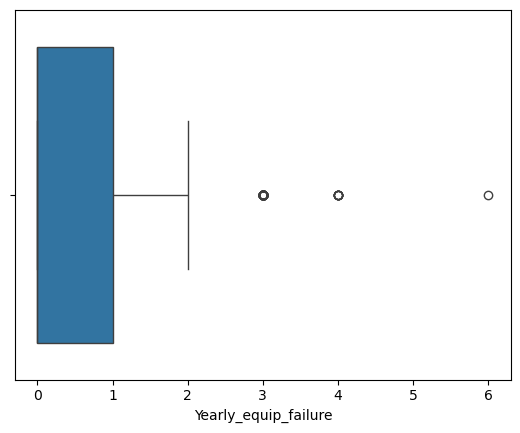

In [103]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Yearly_equip_failure');

### Techie

In [104]:
# Run .nunique() against the column to return the number of unique variables
df['Techie'].nunique()

2

In [105]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Techie'].value_counts()

Techie
No     6266
Yes    1257
Name: count, dtype: int64

In [106]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Techie'].describe()

count     7523
unique       2
top         No
freq      6266
Name: Techie, dtype: object

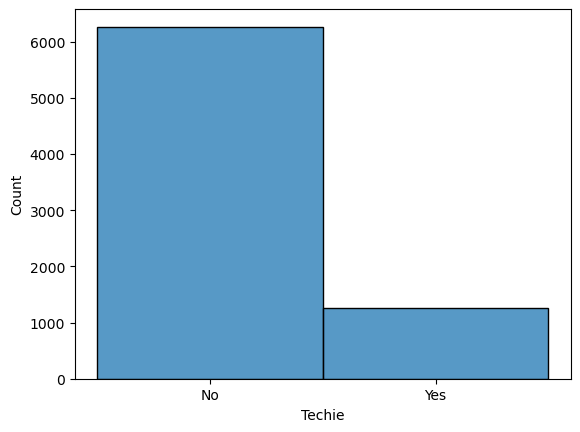

In [107]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Techie');

### Contract

In [108]:
# Run .nunique() against the column to return the number of unique variables
df['Contract'].nunique()

3

In [109]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Contract'].value_counts()

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

In [110]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Contract'].describe()

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object

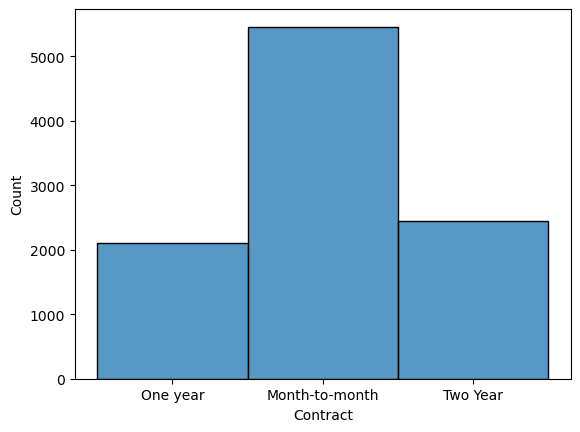

In [111]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Contract');

### Port_modem

In [112]:
# Run .nunique() against the column to return the number of unique variables
df['Port_modem'].nunique()

2

In [113]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Port_modem'].value_counts()

Port_modem
No     5166
Yes    4834
Name: count, dtype: int64

In [114]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Port_modem'].describe()

count     10000
unique        2
top          No
freq       5166
Name: Port_modem, dtype: object

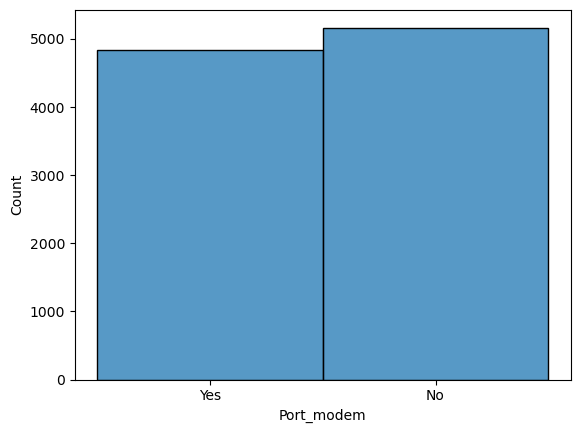

In [115]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Port_modem');

### Tablet

In [116]:
# Run .nunique() against the column to return the number of unique variables
df['Tablet'].nunique()

2

In [117]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Tablet'].value_counts()

Tablet
No     7009
Yes    2991
Name: count, dtype: int64

In [118]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Tablet'].describe()

count     10000
unique        2
top          No
freq       7009
Name: Tablet, dtype: object

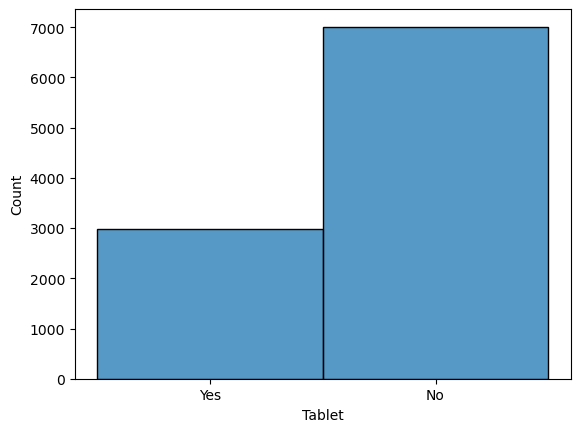

In [119]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Tablet');

### InternetService

In [120]:
# Run .nunique() against the column to return the number of unique variables
df['InternetService'].nunique()

2

In [121]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['InternetService'].value_counts()

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [122]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['InternetService'].describe()

count            7871
unique              2
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

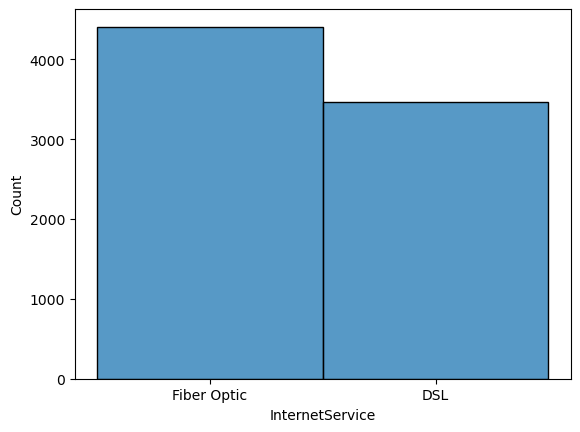

In [123]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='InternetService');

### Phone

In [124]:
# Run .nunique() against the column to return the number of unique variables
df['Phone'].nunique()

2

In [125]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Phone'].value_counts()

Phone
Yes    8128
No      846
Name: count, dtype: int64

In [126]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Phone'].describe()

count     8974
unique       2
top        Yes
freq      8128
Name: Phone, dtype: object

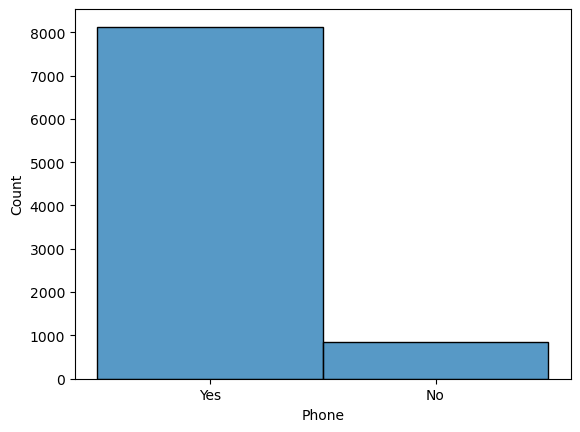

In [127]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Phone');

### Multiple

In [128]:
# Run .nunique() against the column to return the number of unique variables
df['Multiple'].nunique()

2

In [129]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Multiple'].value_counts()

Multiple
No     5392
Yes    4608
Name: count, dtype: int64

In [130]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Multiple'].describe()

count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object

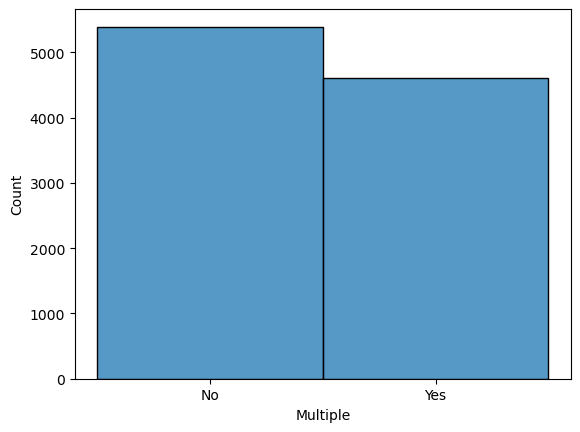

In [131]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Multiple');

### OnlineSecurity

In [132]:
# Run .nunique() against the column to return the number of unique variables
df['OnlineSecurity'].nunique()

2

In [133]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['OnlineSecurity'].value_counts()

OnlineSecurity
No     6424
Yes    3576
Name: count, dtype: int64

In [134]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['OnlineSecurity'].describe()

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object

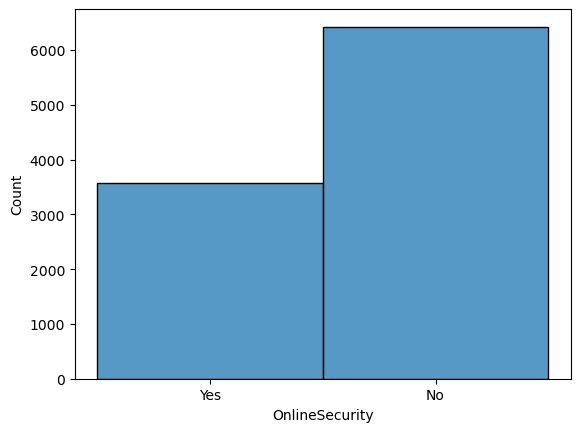

In [135]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='OnlineSecurity');

### OnlineBackup

In [136]:
# Run .nunique() against the column to return the number of unique variables
df['OnlineBackup'].nunique()

2

In [137]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['OnlineBackup'].value_counts()

OnlineBackup
No     5494
Yes    4506
Name: count, dtype: int64

In [138]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['OnlineBackup'].describe()

count     10000
unique        2
top          No
freq       5494
Name: OnlineBackup, dtype: object

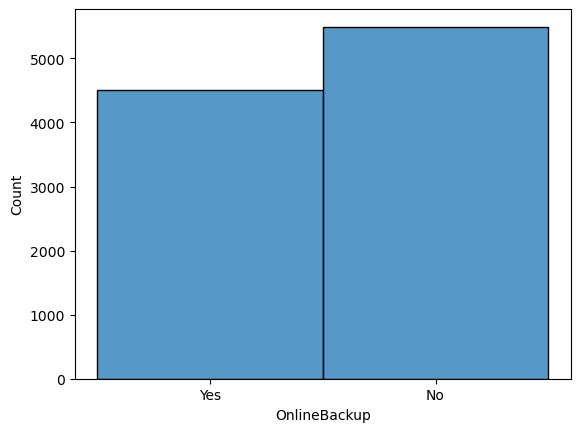

In [139]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='OnlineBackup');

### DeviceProtection

In [140]:
# Run .nunique() against the column to return the number of unique variables
df['DeviceProtection'].nunique()

2

In [141]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['DeviceProtection'].value_counts()

DeviceProtection
No     5614
Yes    4386
Name: count, dtype: int64

In [142]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['DeviceProtection'].describe()

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object

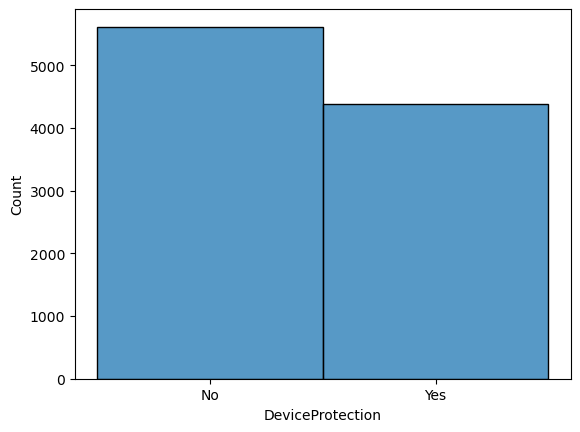

In [143]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='DeviceProtection');

### TechSupport

In [144]:
# Run .nunique() against the column to return the number of unique variables
df['TechSupport'].nunique()

2

In [145]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['TechSupport'].value_counts()

TechSupport
No     5635
Yes    3374
Name: count, dtype: int64

In [146]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['TechSupport'].describe()

count     9009
unique       2
top         No
freq      5635
Name: TechSupport, dtype: object

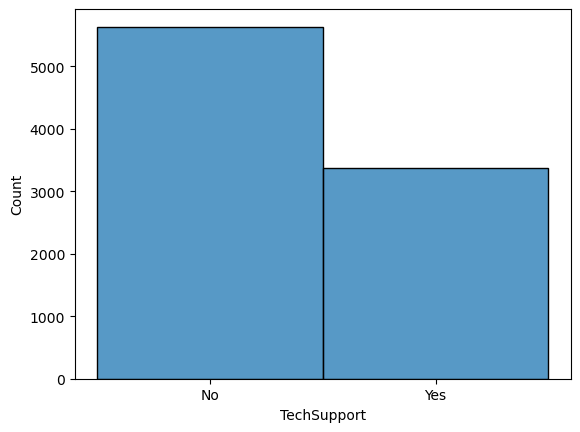

In [147]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='TechSupport');

### StreamingTV

In [148]:
# Run .nunique() against the column to return the number of unique variables
df['StreamingTV'].nunique()

2

In [149]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['StreamingTV'].value_counts()

StreamingTV
No     5071
Yes    4929
Name: count, dtype: int64

In [150]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['StreamingTV'].describe()

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object

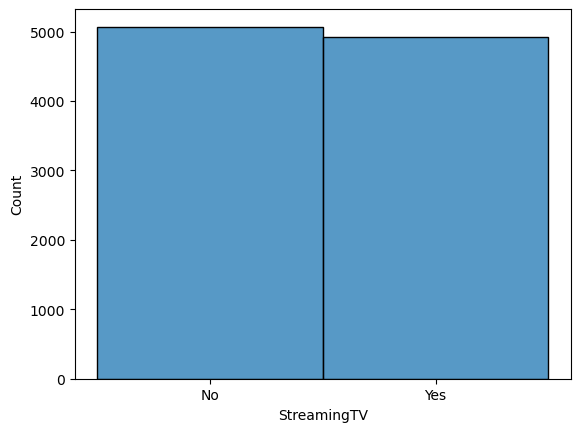

In [151]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='StreamingTV');

### StreamingMovies

In [152]:
# Run .nunique() against the column to return the number of unique variables
df['StreamingMovies'].nunique()

2

In [153]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['StreamingMovies'].value_counts()

StreamingMovies
No     5110
Yes    4890
Name: count, dtype: int64

In [154]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['StreamingMovies'].describe()

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

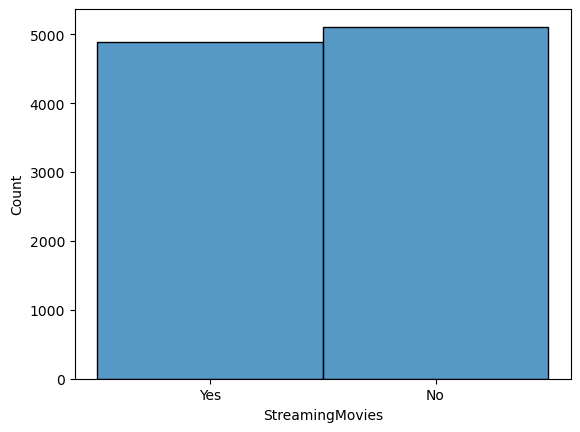

In [155]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='StreamingMovies');

### PaperlessBilling

In [156]:
# Run .nunique() against the column to return the number of unique variables
df['PaperlessBilling'].nunique()

2

In [157]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    5882
No     4118
Name: count, dtype: int64

In [158]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['PaperlessBilling'].describe()

count     10000
unique        2
top         Yes
freq       5882
Name: PaperlessBilling, dtype: object

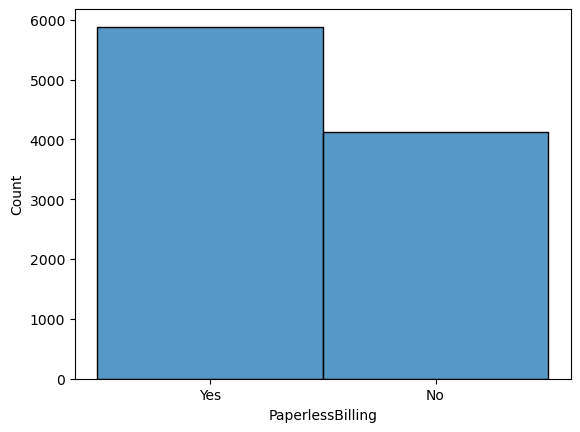

In [159]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='PaperlessBilling');

### PaymentMethod

In [160]:
# Run .nunique() against the column to return the number of unique variables
df['PaymentMethod'].nunique()

4

In [161]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64

In [162]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['PaymentMethod'].describe()

count                10000
unique                   4
top       Electronic Check
freq                  3398
Name: PaymentMethod, dtype: object

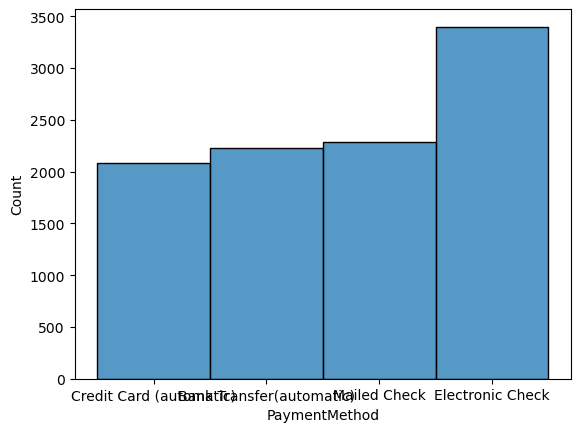

In [163]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='PaymentMethod');

### Tenure

In [164]:
# Run .nunique() against the column to return the number of unique variables
df['Tenure'].nunique()

9065

In [165]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Tenure'].value_counts()

Tenure
69.504800    2
55.449910    2
62.865710    2
66.668530    2
66.509000    1
            ..
17.411300    1
4.461349     1
7.602068     1
8.442986     1
63.350860    1
Name: count, Length: 9065, dtype: int64

In [166]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Tenure'].describe()

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: Tenure, dtype: float64

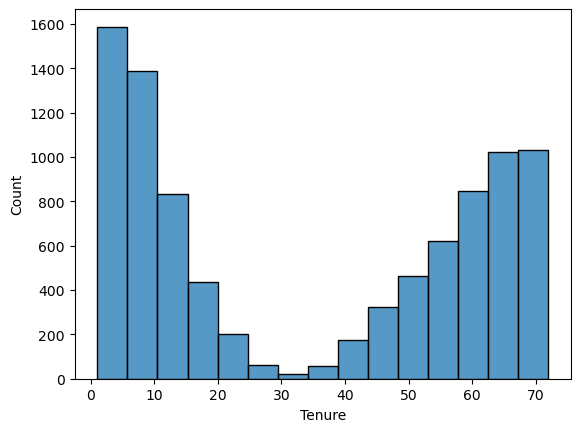

In [167]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Tenure');

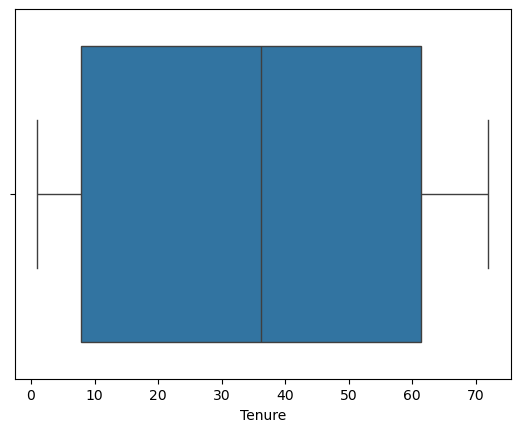

In [168]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Tenure');

### MonthlyCharge

In [169]:
# Run .nunique() against the column to return the number of unique variables
df['MonthlyCharge'].nunique()

9984

In [170]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['MonthlyCharge'].value_counts()

MonthlyCharge
137.4757    3
147.4886    2
115.4933    2
172.9128    2
192.3656    2
           ..
105.9719    1
236.1058    1
150.8860    1
150.3587    1
218.3710    1
Name: count, Length: 9984, dtype: int64

In [171]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['MonthlyCharge'].describe()

count    10000.000000
mean       174.076305
std         43.335473
min         77.505230
25%        141.071078
50%        169.915400
75%        203.777441
max        315.878600
Name: MonthlyCharge, dtype: float64

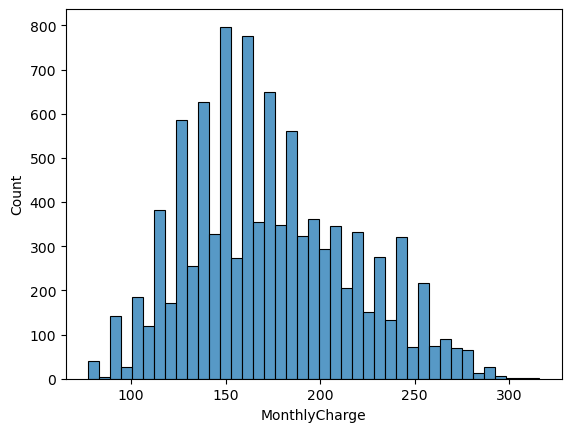

In [172]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='MonthlyCharge');

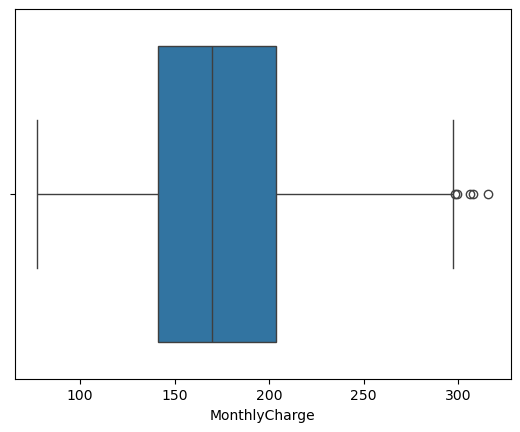

In [173]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='MonthlyCharge');

### Bandwidth_GB_Year

In [174]:
# Run .nunique() against the column to return the number of unique variables
df['Bandwidth_GB_Year'].nunique()

8972

In [175]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['Bandwidth_GB_Year'].value_counts()

Bandwidth_GB_Year
5228.3700    2
5932.6800    2
5626.0940    2
6261.4190    2
6294.8450    2
            ..
1436.9460    1
585.4873     1
686.2609     1
1684.4860    1
5857.5860    1
Name: count, Length: 8972, dtype: int64

In [176]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['Bandwidth_GB_Year'].describe()

count    8979.000000
mean     3398.842752
std      2187.396807
min       155.506715
25%      1234.110529
50%      3382.424000
75%      5587.096500
max      7158.982000
Name: Bandwidth_GB_Year, dtype: float64

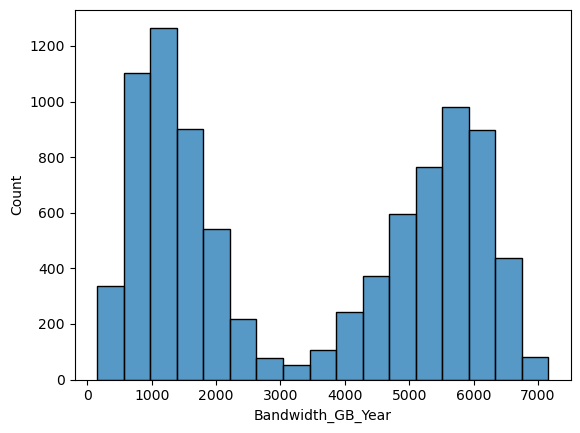

In [177]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='Bandwidth_GB_Year');

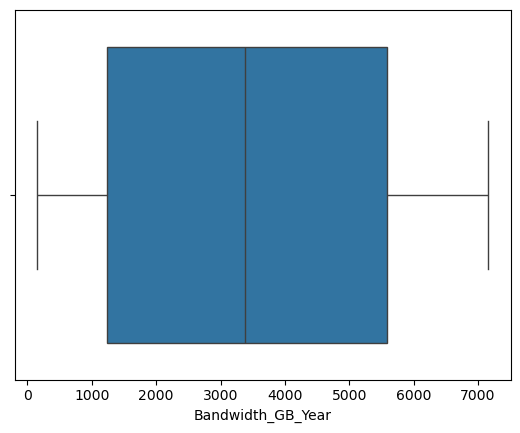

In [178]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='Bandwidth_GB_Year');

### item1

In [179]:
# Run .nunique() against the column to return the number of unique variables
df['item1'].nunique()

7

In [180]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item1'].value_counts()

item1
3    3448
4    3358
2    1393
5    1359
1     224
6     199
7      19
Name: count, dtype: int64

In [181]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item1'].describe()

count    10000.000000
mean         3.490800
std          1.037797
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item1, dtype: float64

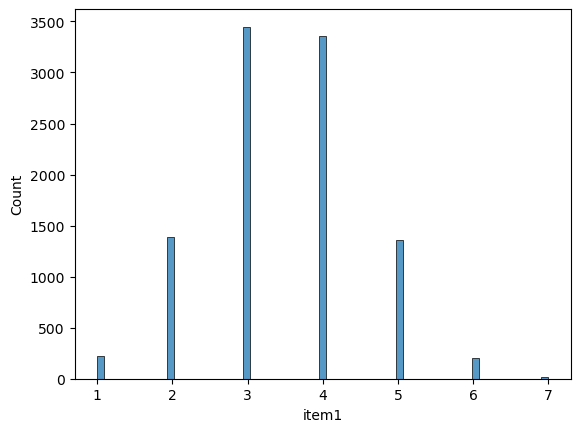

In [182]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item1');

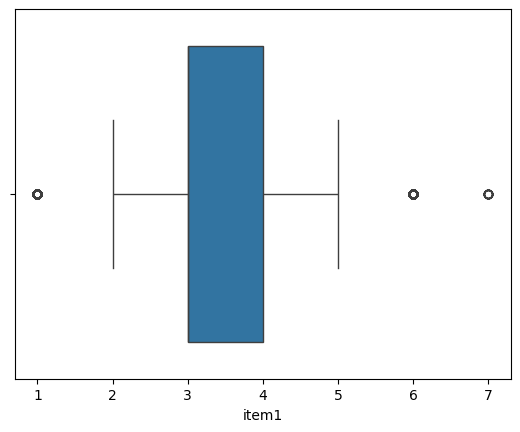

In [183]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item1');

### item2

In [184]:
# Run .nunique() against the column to return the number of unique variables
df['item2'].nunique()

7

In [185]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item2'].value_counts()

item2
3    3415
4    3412
5    1368
2    1360
1     217
6     215
7      13
Name: count, dtype: int64

In [186]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item2'].describe()

count    10000.000000
mean         3.505100
std          1.034641
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: item2, dtype: float64

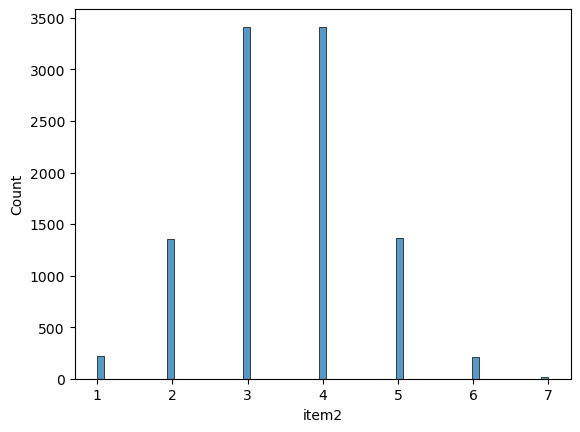

In [187]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item2');

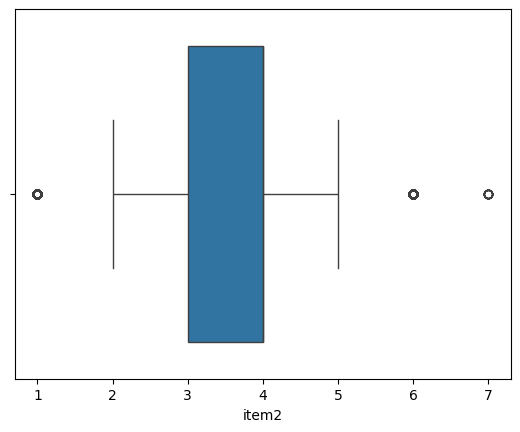

In [188]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item2');

### item3


In [189]:
# Run .nunique() against the column to return the number of unique variables
df['item3'].nunique()

8

In [190]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item3'].value_counts()

item3
3    3435
4    3410
2    1424
5    1313
6     203
1     202
7      12
8       1
Name: count, dtype: int64

In [191]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item3'].describe()

count    10000.000000
mean         3.487000
std          1.027977
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item3, dtype: float64

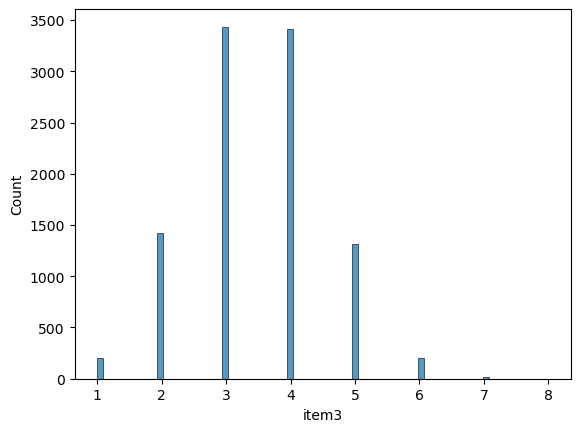

In [192]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item3');

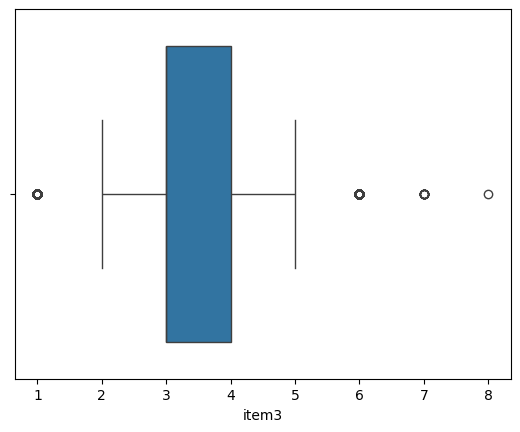

In [193]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item3');

### item4

In [194]:
# Run .nunique() against the column to return the number of unique variables
df['item4'].nunique()

7

In [195]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item4'].value_counts()

item4
4    3452
3    3430
2    1350
5    1335
1     221
6     203
7       9
Name: count, dtype: int64

In [196]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item4'].describe()

count    10000.000000
mean         3.497500
std          1.025816
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item4, dtype: float64

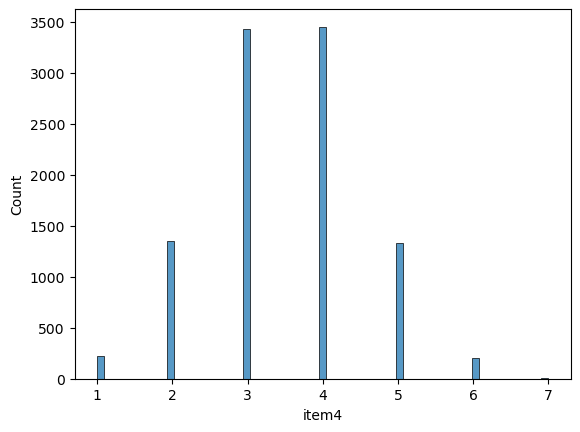

In [197]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item4');

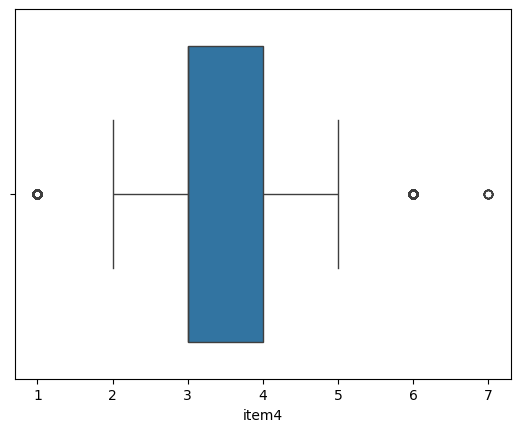

In [198]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item4');

### item5

In [199]:
# Run .nunique() against the column to return the number of unique variables
df['item5'].nunique()

7

In [200]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item5'].value_counts()

item5
3    3462
4    3417
2    1378
5    1321
1     206
6     204
7      12
Name: count, dtype: int64

In [201]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item5'].describe()

count    10000.000000
mean         3.492900
std          1.024819
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: item5, dtype: float64

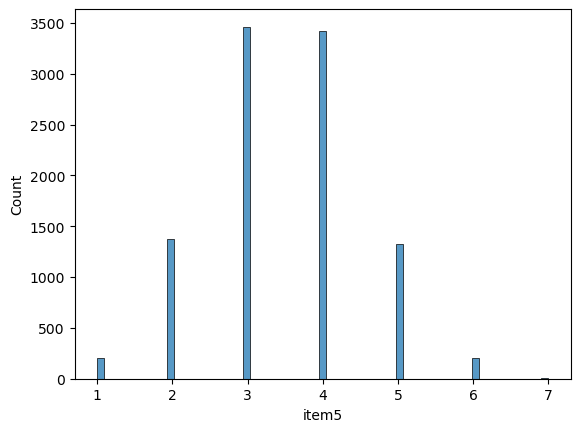

In [202]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item5');

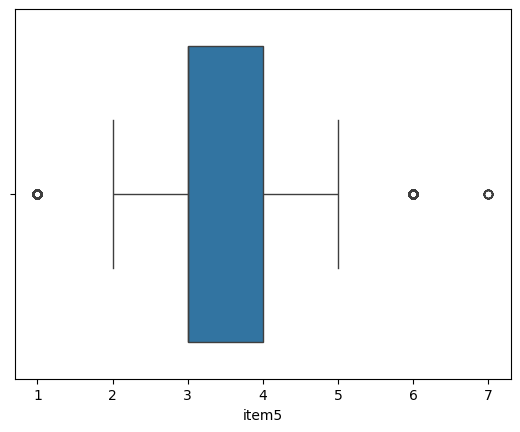

In [203]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item5');

### item6

In [204]:
# Run .nunique() against the column to return the number of unique variables
df['item6'].nunique()

8

In [205]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item6'].value_counts()

item6
3    3445
4    3333
2    1427
5    1382
6     210
1     190
7      12
8       1
Name: count, dtype: int64

In [206]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item6'].describe()

count    10000.000000
mean         3.497300
std          1.033586
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item6, dtype: float64

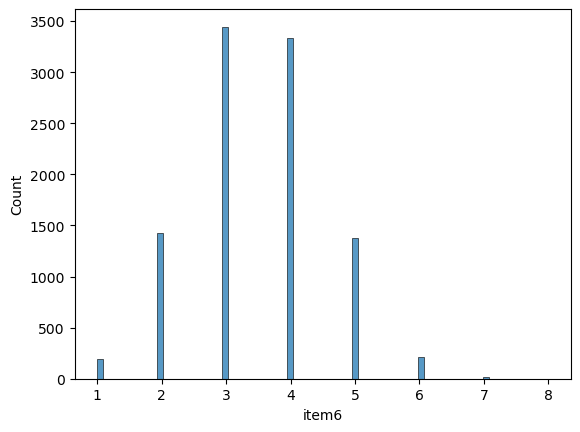

In [207]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item6');

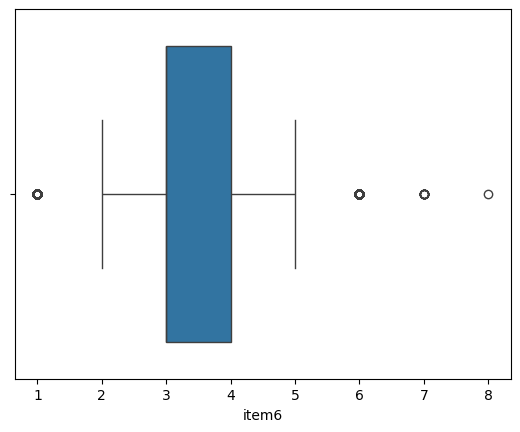

In [208]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item6');

### item7

In [209]:
# Run .nunique() against the column to return the number of unique variables
df['item7'].nunique()

7

In [210]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item7'].value_counts()

item7
4    3456
3    3446
5    1335
2    1309
6     224
1     219
7      11
Name: count, dtype: int64

In [211]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item7'].describe()

count    10000.000000
mean         3.509500
std          1.028502
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          7.000000
Name: item7, dtype: float64

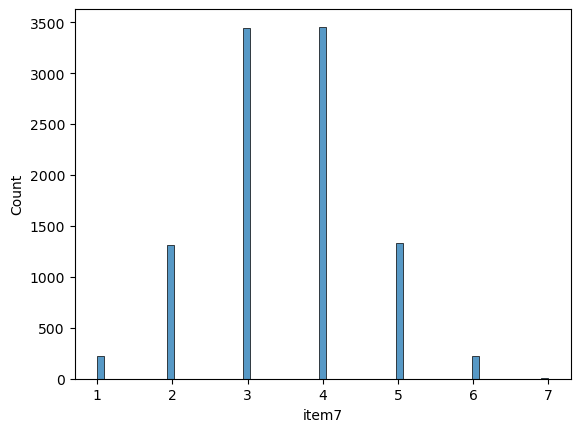

In [212]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item7');

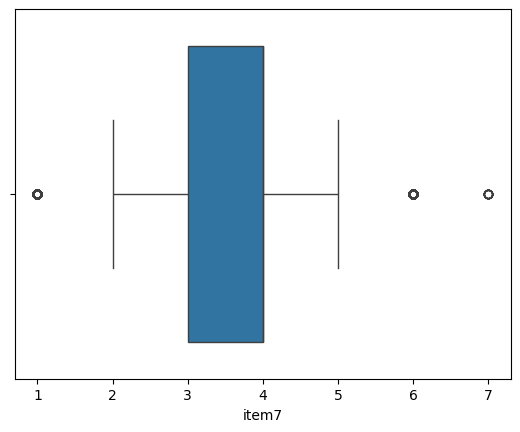

In [213]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item7');

### item8

In [214]:
# Run .nunique() against the column to return the number of unique variables
df['item8'].nunique()

8

In [215]:
# Run .value_counts() against the column to get the frequency of each distinct value in descending order
df['item8'].value_counts()

item8
3    3461
4    3400
2    1378
5    1335
1     206
6     205
7      14
8       1
Name: count, dtype: int64

In [216]:
# Run .describe() against the column to get summary statistics on numeric and object types
df['item8'].describe()

count    10000.000000
mean         3.495600
std          1.028633
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: item8, dtype: float64

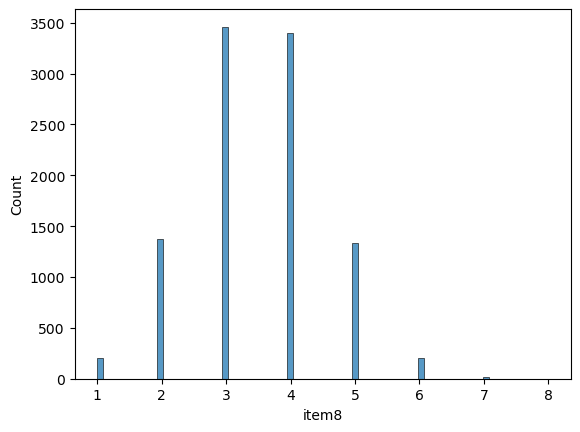

In [217]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='item8');

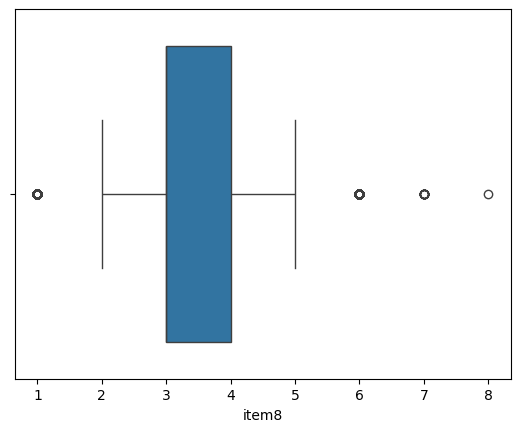

In [218]:
# Create boxplot to visualize spread of data plus outliers
sns.boxplot(data=df, x='item8');

## D1. Cleaning Findings

## D2. Justification of Mitigation Methods

## D3. Summary of the Outcomes

## D4. Data Cleaning (Treatment)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education             10

### Update column names

In [220]:
# Replace the column names with Pythonic names
# * Create a dictionary featuring the existing column names as keys
# * with the names to replace them as values.
column_headers = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',
    'Area': 'area_type',
    'Timezone': 'time_zone',
    'Job': 'job',
    'Children': 'children',
    'Age': 'age',
    'Education': 'education',
    'Employment': 'employment',
    'Income': 'income',
    'Marital': 'marital',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_per_week',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equipment_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'portable_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone_service', # 'Phone' could be mistaken for 'phone_number'
    'Multiple': 'multiple_services',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'item1': 'timely_response',
    'item2': 'timely_fixes',
    'item3': 'timely_replacements',
    'item4': 'reliability',
    'item5': 'service_options',
    'item6': 'respectful_response',
    'item7': 'courteous_exchange',
    'item8': 'active_listening',
}

# Use .rename() method to replace the existing column headers with the column_headers dictionary
# (M. Walker, 2024, p. 24)
df.rename(columns=column_headers, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   case_order                10000 non-null  int64  
 1   customer_id               10000 non-null  object 
 2   interaction               10000 non-null  object 
 3   city                      10000 non-null  object 
 4   state                     10000 non-null  object 
 5   county                    10000 non-null  object 
 6   zip                       10000 non-null  int64  
 7   lat                       10000 non-null  float64
 8   lng                       10000 non-null  float64
 9   population                10000 non-null  int64  
 10  area_type                 10000 non-null  object 
 11  time_zone                 10000 non-null  object 
 12  job                       10000 non-null  object 
 13  children                  7505 non-null   float64
 14  age        

### Change data type to string/object

In [221]:
# Create mask of columns to re-express as string data types
to_string = ['zip', 'lat', 'lng']

# Re-express as string data types
df[to_string] = df[to_string].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   case_order                10000 non-null  int64  
 1   customer_id               10000 non-null  object 
 2   interaction               10000 non-null  object 
 3   city                      10000 non-null  object 
 4   state                     10000 non-null  object 
 5   county                    10000 non-null  object 
 6   zip                       10000 non-null  object 
 7   lat                       10000 non-null  object 
 8   lng                       10000 non-null  object 
 9   population                10000 non-null  int64  
 10  area_type                 10000 non-null  object 
 11  time_zone                 10000 non-null  object 
 12  job                       10000 non-null  object 
 13  children                  7505 non-null   float64
 14  age        

In [222]:
# Add leading 0's to zip codes so that all are 5 digits long
# (Pandas Documentation, Zfill)
df['zip'] = df['zip'].str.zfill(5)

In [223]:
# Verify that in string form, the minimum `zip` value has proceeding 0s as placeholders
df['zip'].min()

'00601'

### Collapse time zone categories

In [224]:
# Check for existing unique values in `time_zone`
df['time_zone'].unique()

array(['America/Sitka', 'America/Detroit', 'America/Los_Angeles',
       'America/Chicago', 'America/New_York', 'America/Puerto_Rico',
       'America/Denver', 'America/Menominee', 'America/Phoenix',
       'America/Indiana/Indianapolis', 'America/Boise',
       'America/Kentucky/Louisville', 'Pacific/Honolulu',
       'America/Indiana/Petersburg', 'America/Nome', 'America/Anchorage',
       'America/Indiana/Knox', 'America/Juneau', 'America/Toronto',
       'America/Indiana/Winamac', 'America/Indiana/Vincennes',
       'America/North_Dakota/New_Salem', 'America/Indiana/Tell_City',
       'America/Indiana/Marengo', 'America/Ojinaga'], dtype=object)

In [225]:
# Create a dictionary of existing time zones with more simplified standard US timezones
# * currently specific to Daylight time unless otherwise specified
# Use .replace() method to replace existing values (keys) with desired values (values)
df['time_zone'] = df['time_zone'].replace({
    'America/Sitka': 'US/Alaska', 
    'America/Detroit': 'US/Eastern', 
    'America/Los_Angeles': 'US/Pacific',
    'America/Chicago': 'US/Central', 
    'America/New_York': 'US/Eastern', 
    # Puerto Rico observes Atlantic Standard Time year-round
    'America/Puerto_Rico': 'US/Atlantic',
    'America/Denver': 'US/Mountain', 
    'America/Menominee': 'US/Central', 
    # Phoenix observes Mountain Standard Time year-round
    'America/Phoenix': 'US/Mountain',
    'America/Indiana/Indianapolis': 'US/Eastern', 
    'America/Boise': 'US/Mountain',
    'America/Kentucky/Louisville': 'US/Eastern', 
    'Pacific/Honolulu': 'US/Hawaii',
    'America/Indiana/Petersburg': 'US/Eastern', 
    'America/Nome': 'US/Atlantic', 
    'America/Anchorage': 'US/Alaska',
    'America/Indiana/Knox': 'US/Central', 
    'America/Juneau': 'US/Alaska', 
    'America/Toronto': 'US/Eastern',
    'America/Indiana/Winamac': 'US/Eastern', 
    'America/Indiana/Vincennes': 'US/Eastern',
    'America/North_Dakota/New_Salem': 'US/Central', 
    'America/Indiana/Tell_City': 'US/Central',
    'America/Indiana/Marengo': 'US/Eastern', 
    'America/Ojinaga': 'US/Central'})

In [226]:
# Check for existing unique values in `time_zone`
df['time_zone'].unique()

array(['US/Alaska', 'US/Eastern', 'US/Pacific', 'US/Central',
       'US/Atlantic', 'US/Mountain', 'US/Hawaii'], dtype=object)

In [227]:
df['time_zone'].value_counts()

time_zone
US/Eastern     4550
US/Central     3698
US/Pacific      887
US/Mountain     713
US/Alaska        65
US/Atlantic      52
US/Hawaii        35
Name: count, dtype: int64

### Re-express variables as nominal categories

In [228]:
# Check current status of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   case_order                10000 non-null  int64  
 1   customer_id               10000 non-null  object 
 2   interaction               10000 non-null  object 
 3   city                      10000 non-null  object 
 4   state                     10000 non-null  object 
 5   county                    10000 non-null  object 
 6   zip                       10000 non-null  object 
 7   lat                       10000 non-null  object 
 8   lng                       10000 non-null  object 
 9   population                10000 non-null  int64  
 10  area_type                 10000 non-null  object 
 11  time_zone                 10000 non-null  object 
 12  job                       10000 non-null  object 
 13  children                  7505 non-null   float64
 14  age        

In [229]:
# Convert the following variables to nominal categories
# (Pandas documentation - Categorical Data)
nominal_categories = ['area_type', 'time_zone', 
                      'marital', 'gender', 
                      'contract', 'payment_method', 
                      'education'] # Education could be ordinal but there is no reason to believe so for this dataset
df[nominal_categories] = df[nominal_categories].astype('category')

# Check for conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   case_order                10000 non-null  int64   
 1   customer_id               10000 non-null  object  
 2   interaction               10000 non-null  object  
 3   city                      10000 non-null  object  
 4   state                     10000 non-null  object  
 5   county                    10000 non-null  object  
 6   zip                       10000 non-null  object  
 7   lat                       10000 non-null  object  
 8   lng                       10000 non-null  object  
 9   population                10000 non-null  int64   
 10  area_type                 10000 non-null  category
 11  time_zone                 10000 non-null  category
 12  job                       10000 non-null  object  
 13  children                  7505 non-null   float64 


In [230]:
df['churn'].value_counts()

churn
No     7350
Yes    2650
Name: count, dtype: int64

In [231]:
# Create a gender mapping dictionary to replace 'Male' with 'M',
# 'Female' with 'F', and 'Prefer not to answer' with 'NA'
gender_mapping_dict = {'Male': 'M',
                      'Female': 'F',
                      'Prefer not to answer': 'NA'}

# Apply mapping dictionary to Gender values
df['gender'] = df['gender'].replace(gender_mapping_dict)
                                    
# Check for values
df['gender'].value_counts()

/var/folders/z_/ggsmtm0166b9vhd45q376l3c0000gn/T/ipykernel_5888/1685331710.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['gender'] = df['gender'].replace(gender_mapping_dict)


gender
F     5025
M     4744
NA     231
Name: count, dtype: int64

### Re-express as Boolean values

In [232]:
# Create a mapping dictionary to replace 'No' values with 0 and 'Yes' values with 1
bool_mapping_dict = {'No': 0, 'Yes': 1}

# Create a list of variables to convert to Booleans
bool_variables = ['churn', 'techie', 'portable_modem', 'tablet', 'internet_service', 
                  'phone_service', 'multiple_services', 'online_security', 'online_backup',
                  'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
                  'paperless_billing']

# Apply mapping dictionary to object types that should be Booleans
df[bool_variables] = df[bool_variables].replace(bool_mapping_dict)

In [233]:
df[bool_variables].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   churn              10000 non-null  object
 1   techie             7523 non-null   object
 2   portable_modem     10000 non-null  object
 3   tablet             10000 non-null  object
 4   internet_service   7871 non-null   object
 5   phone_service      8974 non-null   object
 6   multiple_services  10000 non-null  object
 7   online_security    10000 non-null  object
 8   online_backup      10000 non-null  object
 9   device_protection  10000 non-null  object
 10  tech_support       9009 non-null   object
 11  streaming_tv       10000 non-null  object
 12  streaming_movies   10000 non-null  object
 13  paperless_billing  10000 non-null  object
dtypes: object(14)
memory usage: 1.1+ MB


In [234]:
# Convert the bool_variables list to Boolean categories
df[bool_variables] = df[bool_variables].astype('bool')

# Check for conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   case_order                10000 non-null  int64   
 1   customer_id               10000 non-null  object  
 2   interaction               10000 non-null  object  
 3   city                      10000 non-null  object  
 4   state                     10000 non-null  object  
 5   county                    10000 non-null  object  
 6   zip                       10000 non-null  object  
 7   lat                       10000 non-null  object  
 8   lng                       10000 non-null  object  
 9   population                10000 non-null  int64   
 10  area_type                 10000 non-null  category
 11  time_zone                 10000 non-null  category
 12  job                       10000 non-null  object  
 13  children                  7505 non-null   float64 


### Re-express as ordinal categories

In [235]:
# Convert survey questions to Ordinal Categories
# Create a survey response structure
# (DataCamp 2024)
survey_responses = CategoricalDtype(categories=["8", "7", "6", "5", "4", "3", "2", "1"], ordered=True)

# Create a mask of the survey questions
survey_questions = ['timely_response', 'timely_fixes', 
                    'timely_replacements', 'reliability', 
                    'service_options', 'respectful_response', 
                    'courteous_exchange', 'active_listening']

# Convert the survey responses to ordinal categories
df[survey_questions] = df[survey_questions].map(str)
df[survey_questions] = df[survey_questions].astype(survey_responses)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   case_order                10000 non-null  int64   
 1   customer_id               10000 non-null  object  
 2   interaction               10000 non-null  object  
 3   city                      10000 non-null  object  
 4   state                     10000 non-null  object  
 5   county                    10000 non-null  object  
 6   zip                       10000 non-null  object  
 7   lat                       10000 non-null  object  
 8   lng                       10000 non-null  object  
 9   population                10000 non-null  int64   
 10  area_type                 10000 non-null  category
 11  time_zone                 10000 non-null  category
 12  job                       10000 non-null  object  
 13  children                  7505 non-null   float64 


In [236]:
df['timely_response'].value_counts(sort=False)

timely_response
8       0
7      19
6     199
5    1359
4    3358
3    3448
2    1393
1     224
Name: count, dtype: int64

In [237]:
df['timely_fixes'].value_counts(sort=False)

timely_fixes
8       0
7      13
6     215
5    1368
4    3412
3    3415
2    1360
1     217
Name: count, dtype: int64

In [238]:
df['timely_replacements'].value_counts(sort=False)

timely_replacements
8       1
7      12
6     203
5    1313
4    3410
3    3435
2    1424
1     202
Name: count, dtype: int64

In [239]:
df['reliability'].value_counts(sort=False)

reliability
8       0
7       9
6     203
5    1335
4    3452
3    3430
2    1350
1     221
Name: count, dtype: int64

In [240]:
df['service_options'].value_counts(sort=False)

service_options
8       0
7      12
6     204
5    1321
4    3417
3    3462
2    1378
1     206
Name: count, dtype: int64

In [241]:
df['respectful_response'].value_counts(sort=False)

respectful_response
8       1
7      12
6     210
5    1382
4    3333
3    3445
2    1427
1     190
Name: count, dtype: int64

In [242]:
df['courteous_exchange'].value_counts(sort=False)

courteous_exchange
8       0
7      11
6     224
5    1335
4    3456
3    3446
2    1309
1     219
Name: count, dtype: int64

In [243]:
df['active_listening'].value_counts(sort=False)

active_listening
8       1
7      14
6     205
5    1335
4    3400
3    3461
2    1378
1     206
Name: count, dtype: int64

### Treat erroneous values

In [244]:
df['outage_sec_per_week'].describe()

count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: outage_sec_per_week, dtype: float64

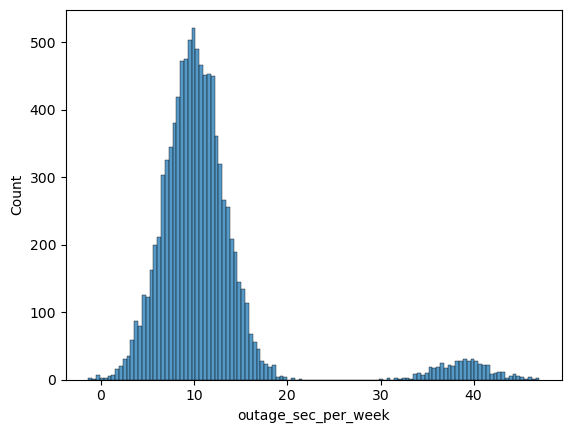

In [245]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='outage_sec_per_week');

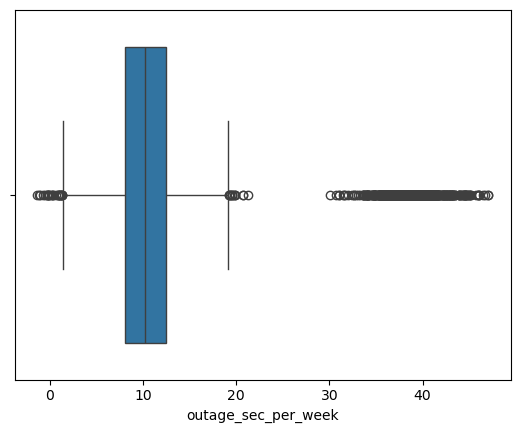

In [246]:
# Create histogram to view a preliminary spread of the data and distribution
sns.boxplot(data=df, x='outage_sec_per_week');

In [247]:
df['outage_sec_per_week'] = df['outage_sec_per_week'].abs()
df['outage_sec_per_week'].describe()

count    10000.000000
mean        11.454229
std          7.023844
min          0.113821
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: outage_sec_per_week, dtype: float64

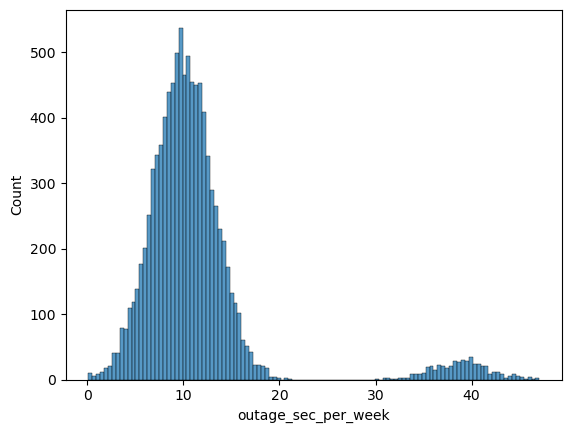

In [248]:
# Create histogram to view a preliminary spread of the data and distribution
sns.histplot(data=df, x='outage_sec_per_week');

### Treat Missing Values

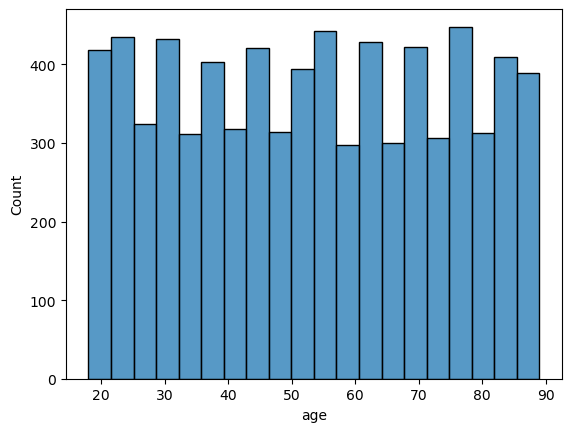

In [249]:
# Variable: age
# Re-check the original distribution
sns.histplot(data=df, x='age');

In [250]:
# Get central values for age
print(df['age'].median())
print(df['age'].mean())
print(df['age'].mode())

# Fill null values with mean due to normal distribution
df['age'] = df['age'].fillna(df['age'].mean())

# Check for number of null values
df['age'].isnull().sum()

53.0
53.27574750830565
0    55.0
Name: age, dtype: float64


0

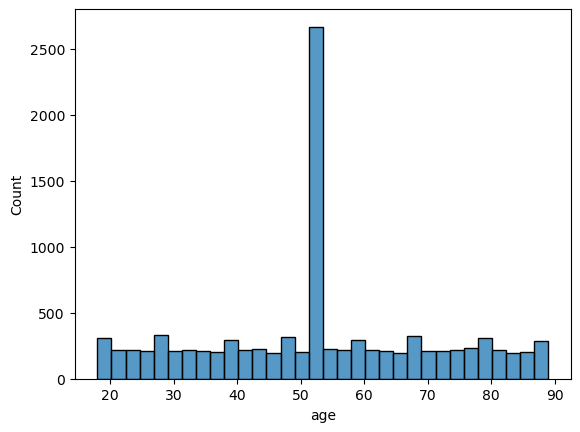

In [251]:
# Check the new distribution
sns.histplot(data=df, x='age');

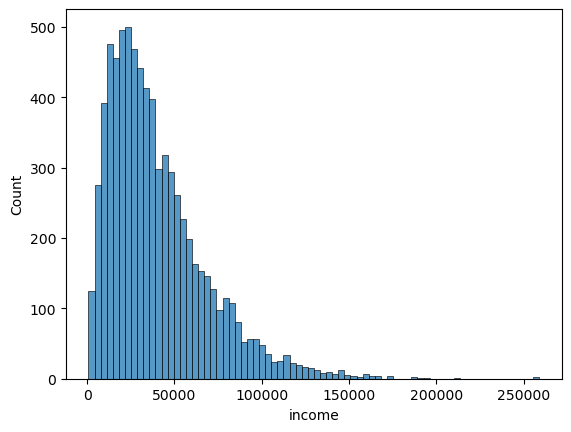

In [252]:
# Variable: income
# Check the original distribution
sns.histplot(data=df, x='income');

In [253]:
# Get central values for income
print(df['income'].median())
print(df['income'].mean())
print(df['income'].mode())

# Fill null values with median due to skewed distribution
df['income'] = df['income'].fillna(df['income'].median())

# Check for number of null values
df['income'].isnull().sum()

33186.785
39936.76222636485
0    10530.09
1    25598.66
2    36461.20
3    61325.92
Name: income, dtype: float64


0

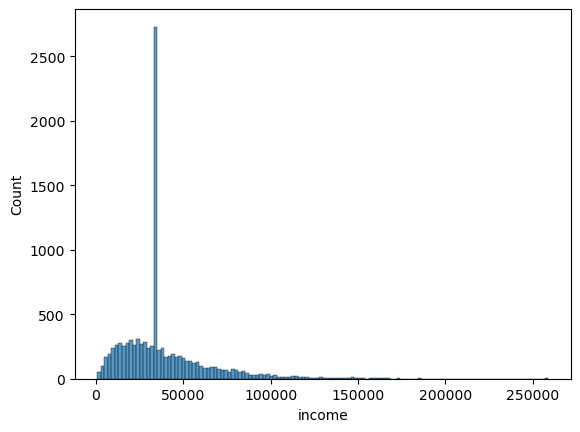

In [254]:
# Check the new distribution
sns.histplot(data=df, x='income');

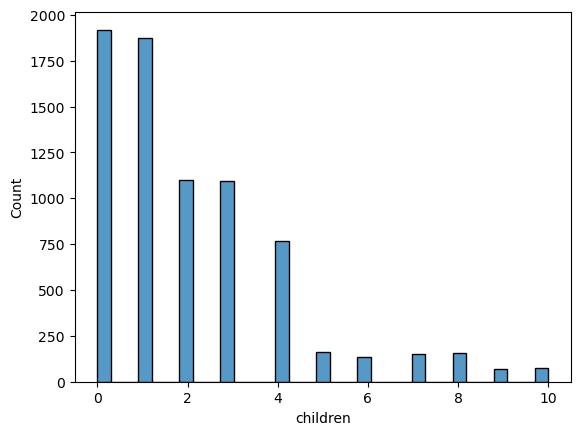

In [255]:
# Variable: children
# Re-check the original distribution
sns.histplot(data=df, x='children');

In [256]:
# Get central values for children
print(df['children'].median())
print(df['children'].mean())
print(df['children'].mode())

# Fill null values with 0 due to failure of customer to report input
df['children'] = df['children'].fillna(0)

# Check for number of null values
df['children'].isnull().sum()

1.0
2.095936042638241
0    0.0
Name: children, dtype: float64


0

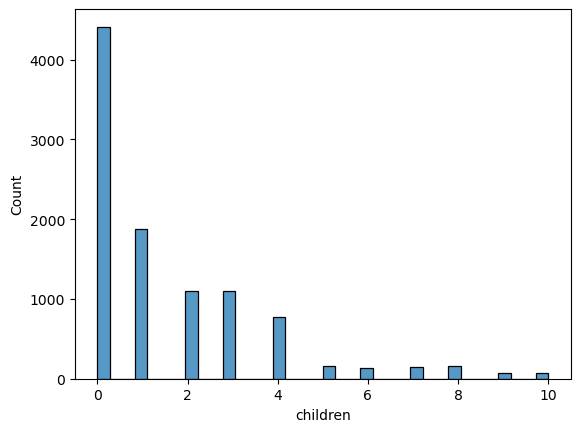

In [257]:
# Check the new distribution
sns.histplot(data=df, x='children');

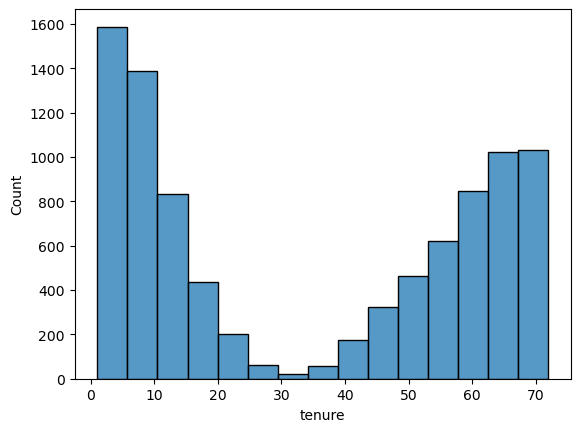

In [258]:
# Variable: tenure
# Re-check the original distribution
sns.histplot(data=df, x='tenure');

In [259]:
# Get central values for tenure
print(df['tenure'].median())
print(df['tenure'].mean())
print(df['tenure'].mode())

# Fill null values with 0 due to failure of system to report tenure or customer churning
df['tenure'] = df['tenure'].fillna(0)

# Check for number of null values
df['tenure'].isnull().sum()

36.19603
34.49885764604521
0    55.44991
1    62.86571
2    66.66853
3    69.50480
Name: tenure, dtype: float64


0

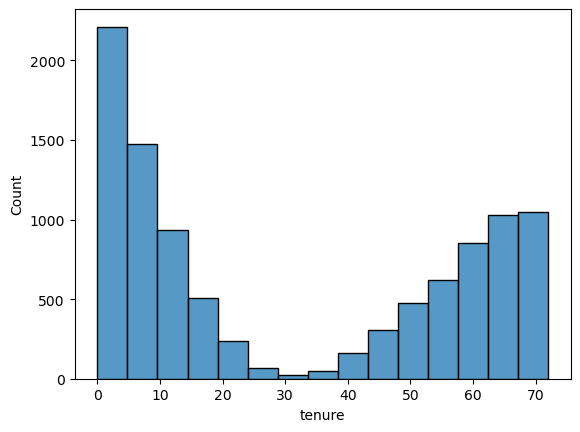

In [260]:
# Check the new distribution
sns.histplot(data=df, x='tenure');

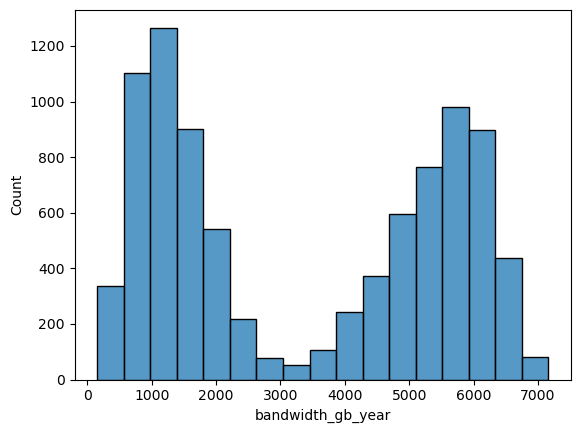

In [261]:
# Variable: bandwidth_gb_year
# Re-check the original distribution
sns.histplot(data=df, x='bandwidth_gb_year');

In [262]:
# Get central values for tenure
print(df['bandwidth_gb_year'].median())
print(df['bandwidth_gb_year'].mean())
print(df['bandwidth_gb_year'].mode())

# Fill null values with 0 due to failure of system to report bandwidth_gb_year or due to customer churning
df['bandwidth_gb_year'] = df['bandwidth_gb_year'].fillna(0)

# Check for number of null values
df['bandwidth_gb_year'].isnull().sum()

3382.424
3398.842752015135
0    5228.370
1    5626.094
2    5932.680
3    6081.603
4    6261.419
5    6294.845
6    6417.345
Name: bandwidth_gb_year, dtype: float64


0

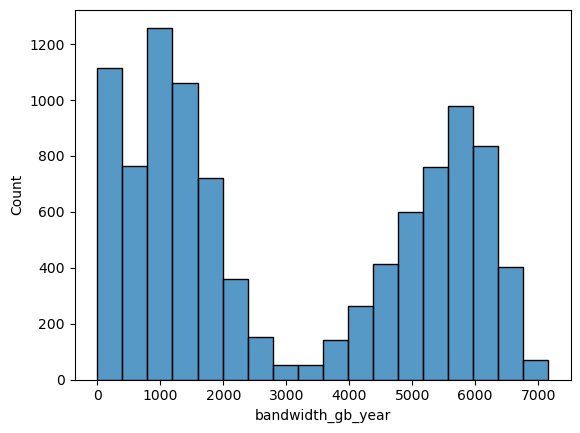

In [263]:
# Check the new distribution
sns.histplot(data=df, x='bandwidth_gb_year');

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   case_order                10000 non-null  int64   
 1   customer_id               10000 non-null  object  
 2   interaction               10000 non-null  object  
 3   city                      10000 non-null  object  
 4   state                     10000 non-null  object  
 5   county                    10000 non-null  object  
 6   zip                       10000 non-null  object  
 7   lat                       10000 non-null  object  
 8   lng                       10000 non-null  object  
 9   population                10000 non-null  int64   
 10  area_type                 10000 non-null  category
 11  time_zone                 10000 non-null  category
 12  job                       10000 non-null  object  
 13  children                  10000 non-null  float64 


## D5. Cleaned Data

See attached CSV file for output

In [265]:
# Save cleaned DataFrame as CSV, removing imposed index
df.to_csv('churn_data_cleaned_Murdock_Shanay.csv', index=False)